
Desafio Analítica Avanzada
Descubriendo Exoplanetas

NOMBRE: JOSE ARTURO VALDIVIA RIVERA
CI: 8350080

Identificacion  y  Preparaci´on  de  Datos
La  primera  tarea  a  realizar  es  una  identificaci´on  de  las  variables,  en  particular  de  la  variable objetivo, estudios estad´ısticos y manipulaci´on, como se indica a continuaci´on:




0.Cargado de Base

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
import pandas as pd

In [171]:
df = pd.read_csv('/content/Baseplaneta.csv')
df

,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,deg_sc,koi_kepmag
0,CONFIRMED,"544,183,827","0,0002479","-0,0002479","16,251,384","0,00352","-0,00352","0,586","0,059","-0,443",...,"4,467","0,064","-0,096","0,927","0,105","-0,061","29,193,423","48,141,651",NA,"15,347"
1,FALSE POSITIVE,"1,989,913,995","1,49E-05","-1,49E-05","175,850,252","0,000581","-0,000581","0,969","5,126","-0,077",...,"4,544","0,044","-0,176","0,868","0,233","-0,078","29,700,482","48,134,129",NA,"15,436"
2,FALSE POSITIVE,"1,736,952,453","2,63E-07","-2,63E-07","170,307,565","0,000115","-0,000115","1,276","0,115","-0,092",...,"4,564","0,053","-0,168","0,791","0,201","-0,067","28,553,461","4,828,521",NA,"15,597"
3,CONFIRMED,"2,525,591,777","3,76E-06","-3,76E-06","17,159,555","0,00113","-0,00113","0,701","0,235","-0,478",...,"4,438","0,07","-0,21","1,046","0,334","-0,133","28,875,488","482,262",NA,"15,509"
4,CONFIRMED,"413,443,512","1,05E-05","-1,05E-05","17,297,937","0,0019","-0,0019","0,762","0,139","-0,532",...,"4,486","0,054","-0,229","0,972","0,315","-0,105","29,628,613","4,822,467",NA,"15,714"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,"85,898,708","0,0001846","-0,0001846","1,320,161","0,0157","-0,0157","0,765","0,023","-0,541",...,"4,296","0,231","-0,189","1,088","0,313","-0,228","29,874,921","46,973,351",NA,"14,478"
6987,FALSE POSITIVE,"0,527698548","1,16E-07","-1,16E-07","131,705,093","0,00017","-0,00017","1,252","0,051","-0,049",...,"4,529","0,035","-0,196","0,903","0,237","-0,079","29,718,875","47,093,819","1,321,144,397","14,082"
6988,CANDIDATE,"173,984,941","1,78E-05","-1,78E-05","13,300,127","0,00769","-0,00769","0,043","0,423","-0,043",...,"4,444","0,056","-0,224","1,031","0,341","-0,114","28,650,937","47,163,219",NA,"14,757"
6989,FALSE POSITIVE,"0,681401611","2,43E-06","-2,43E-06","13,218,175","0,00285","-0,00285","0,147","0,309","-0,147",...,"4,447","0,056","-0,224","1,041","0,341","-0,114","29,416,489","47,176,281",NA,"15,385"


In [213]:

# se remplaza , por . expecto la variable dependiente.
for col in df:
    if col != 'koi_disposition':
        # remplaza ',' por  '.' y  convierte a  numeric
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

#
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| koi_disposition   | koi_period_err1   | koi_period_err2   | koi_time0bk_err1   | koi_time0bk_err2   | koi_impact   | koi_impact_err1   | koi_impact_err2   | koi_duration   | koi_duration_err1   | koi_duration_err2   | koi_depth   | koi_depth_err1   | koi_depth_err2   | koi_prad   | koi_prad_err1   | koi_prad_err2   | koi_teq   | koi_insol   | koi_insol_err1   | koi_insol_err2   | koi_model_snr   | koi_tce_plnt_num   | koi_steff   | koi_steff_err1   | koi_steff_err2   | koi_slogg   | koi_slogg_err1   | koi_slogg_err2   | koi_srad   | koi_srad_err1   | koi_srad_err2   | koi_kepmag   |
|:------------------|:------------------|:------------------|:-------------------|:-------------------|:-------------|:------------------|:------------------|:---------------|:--------------------|:--------------------|:------------|:-----------------|:-----------------|:-----------|:----------------|:----------------|:----------|:------------|:-----------------|:-----------------|:----------------|:-----

La base cuenta con 6991 observaciones y 38 variables o columnas.


1.	Identifique la variable objetivo para modelar

In [176]:
print(df.describe())

       koi_period  koi_period_err1  koi_period_err2  koi_time0bk  \
count  738.000000     6.991000e+03     6.991000e+03   288.000000   
mean     8.515841     1.851122e-03    -1.851122e-03   198.296993   
std     66.744251     7.184503e-03     7.184503e-03    91.853599   
min      0.259820     1.100000e-08    -1.568000e-01   125.881000   
25%      0.571264     5.005000e-06    -2.401000e-04   134.975000   
50%      0.730332     3.300000e-05    -3.300000e-05   150.681500   
75%      0.901536     2.401000e-04    -5.005000e-06   232.522000   
max    927.989000     1.568000e-01    -1.100000e-08   523.348000   

       koi_time0bk_err1  koi_time0bk_err2   koi_impact  koi_impact_err1  \
count       6991.000000       6991.000000  6982.000000      6967.000000   
mean           0.009340         -0.009340     1.523930         1.952069   
std            0.021989          0.021989    23.485276         9.417338   
min            0.000009         -0.569000     0.000600         0.000200   
25%         

La variable objetivo es la variable que queremos predecir o la variable dependiente. En este caso, queremos predecir si un candidato es un exoplaneta confirmado o no.



Se cuenta con una variable interesante  koi_dispositio la cual describe planetas con, con valores 'CONFIRMED' para exoplanetas confirmados y 'FALSE POSITIVE' para los que no lo son.

2.	Identifique variables que presentan un valor promedio muy distinto entre planetas confirma- dos y falsos positivos. Comente



In [177]:


# Se transporma la columna a binaria donde CONFIRMED es 1 y 'FALSE POSITIVE' es 0
df['koi_disposition'] = df['koi_disposition'].map({'CONFIRMED': 1, 'FALSE POSITIVE': 0})

# las columnas columnas se almacenan en variable
numeric_cols = df.select_dtypes(include='number').columns

# para todas las columans menos la dependiente.
for col in numeric_cols:
    if col != 'koi_disposition':
        # Se calcula la media para cada variable.
        mean_confirmed = df[df['koi_disposition'] == 1][col].mean()
        mean_false_positive = df[df['koi_disposition'] == 0][col].mean()

        # Se calcula la diferencial
        mean_diff = abs(mean_confirmed - mean_false_positive)

        # Mostrar la columna y la diferencia de promedio
        print(f"Variable: {col}, Mean Difference: {mean_diff:.2f}")

        if mean_diff >= 0:
            print(f"Variable con gran diferencia de medias: {col}, Mean Difference: {mean_diff:.2f}")

Variable: koi_period, Mean Difference: 4.87
Variable con gran diferencia de medias: koi_period, Mean Difference: 4.87
Variable: koi_period_err1, Mean Difference: 0.00
Variable con gran diferencia de medias: koi_period_err1, Mean Difference: 0.00
Variable: koi_period_err2, Mean Difference: 0.00
Variable con gran diferencia de medias: koi_period_err2, Mean Difference: 0.00
Variable: koi_time0bk, Mean Difference: 39.80
Variable con gran diferencia de medias: koi_time0bk, Mean Difference: 39.80
Variable: koi_time0bk_err1, Mean Difference: 0.01
Variable con gran diferencia de medias: koi_time0bk_err1, Mean Difference: 0.01
Variable: koi_time0bk_err2, Mean Difference: 0.01
Variable con gran diferencia de medias: koi_time0bk_err2, Mean Difference: 0.01
Variable: koi_impact, Mean Difference: 1.93
Variable con gran diferencia de medias: koi_impact, Mean Difference: 1.93
Variable: koi_impact_err1, Mean Difference: 2.61
Variable con gran diferencia de medias: koi_impact_err1, Mean Difference: 2.6

Las variables koi_depth, koi_insol, koi_insol_err1, koi_insol_err2  muestran una diferencia promedio superior  entre los planetas confirmados y los falsos positivos. Esto indica que estas variables podrían ser muy útiles para distinguir

3.	Eligiendo  una  tecnica  de  su  preferencia,  reduzca  la  cantidad  de  variables  a  la  mitad  procurando causar el menor impacto posible en la capacidad predictiva.

In [178]:
dstd= df.std()

print(dstd)

koi_disposition           0.473539
koi_period               66.744251
koi_period_err1           0.007185
koi_period_err2           0.007185
koi_time0bk              91.853599
koi_time0bk_err1          0.021989
koi_time0bk_err2          0.021989
koi_impact               23.485276
koi_impact_err1           9.417338
koi_impact_err2           1.351394
koi_duration            136.266309
koi_duration_err1         0.665791
koi_duration_err2         0.665791
koi_depth              1179.201603
koi_depth_err1           96.060224
koi_depth_err2           96.060224
koi_prad               1099.054676
koi_prad_err1            19.898776
koi_prad_err2            27.072781
koi_teq                 340.710550
koi_insol            177525.622421
koi_insol_err1        56108.761541
koi_insol_err2        99305.279197
koi_model_snr           790.051182
koi_tce_plnt_num          0.650089
koi_steff                 0.802060
koi_steff_err1           46.308809
koi_steff_err2           65.789504
koi_slogg           

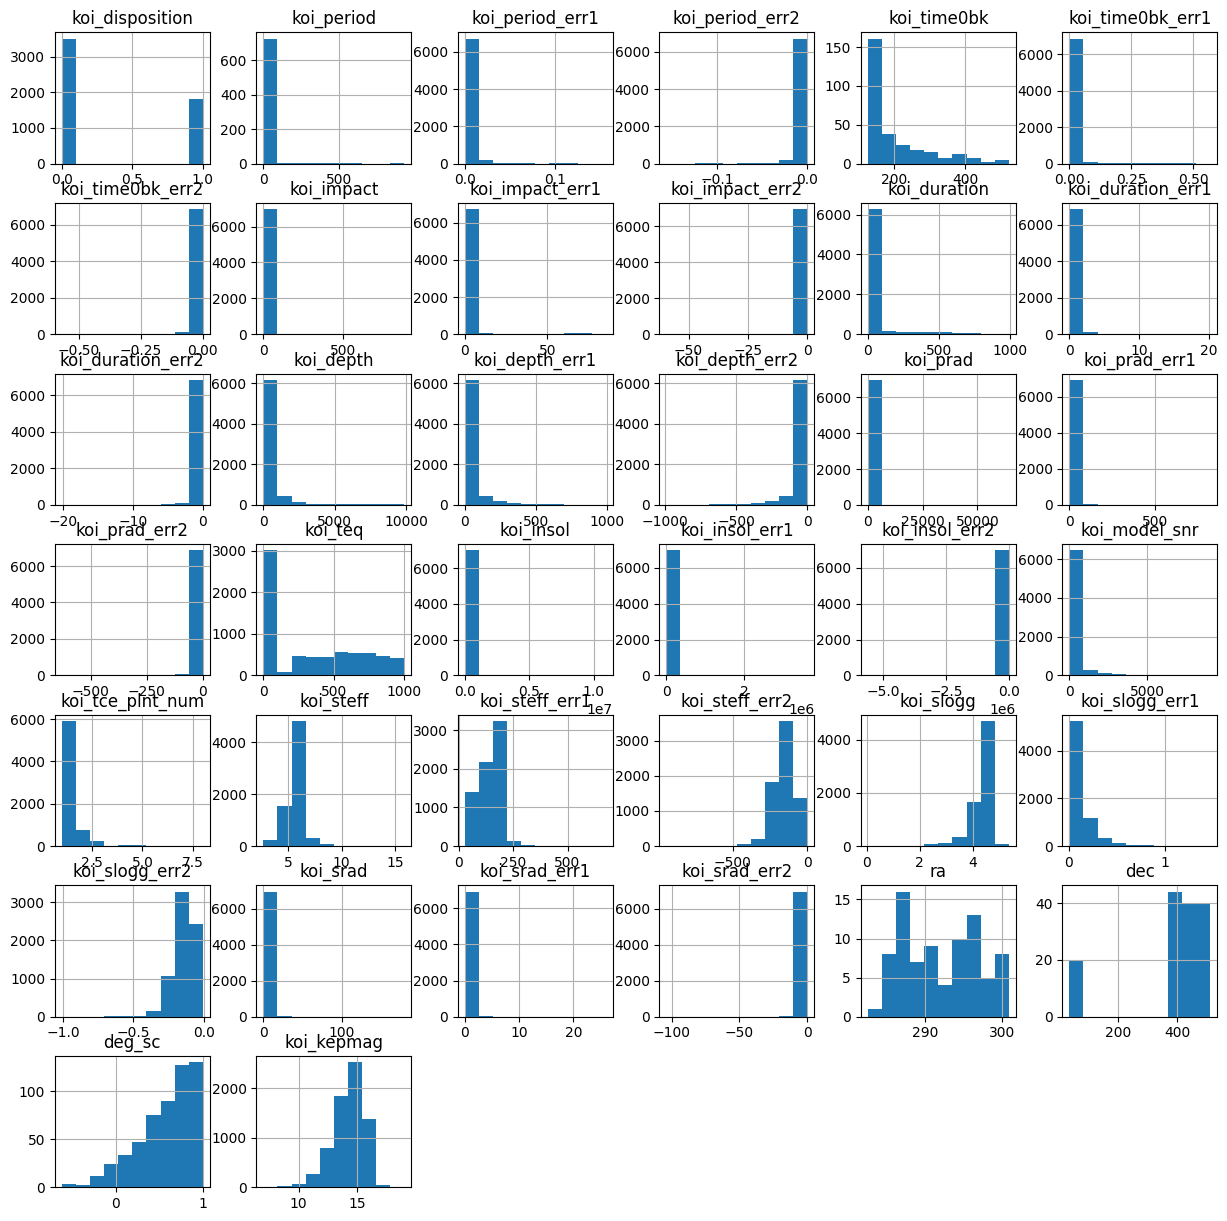

In [179]:
# histograma de las variables
df.hist(figsize=(15,15))
plt.show()

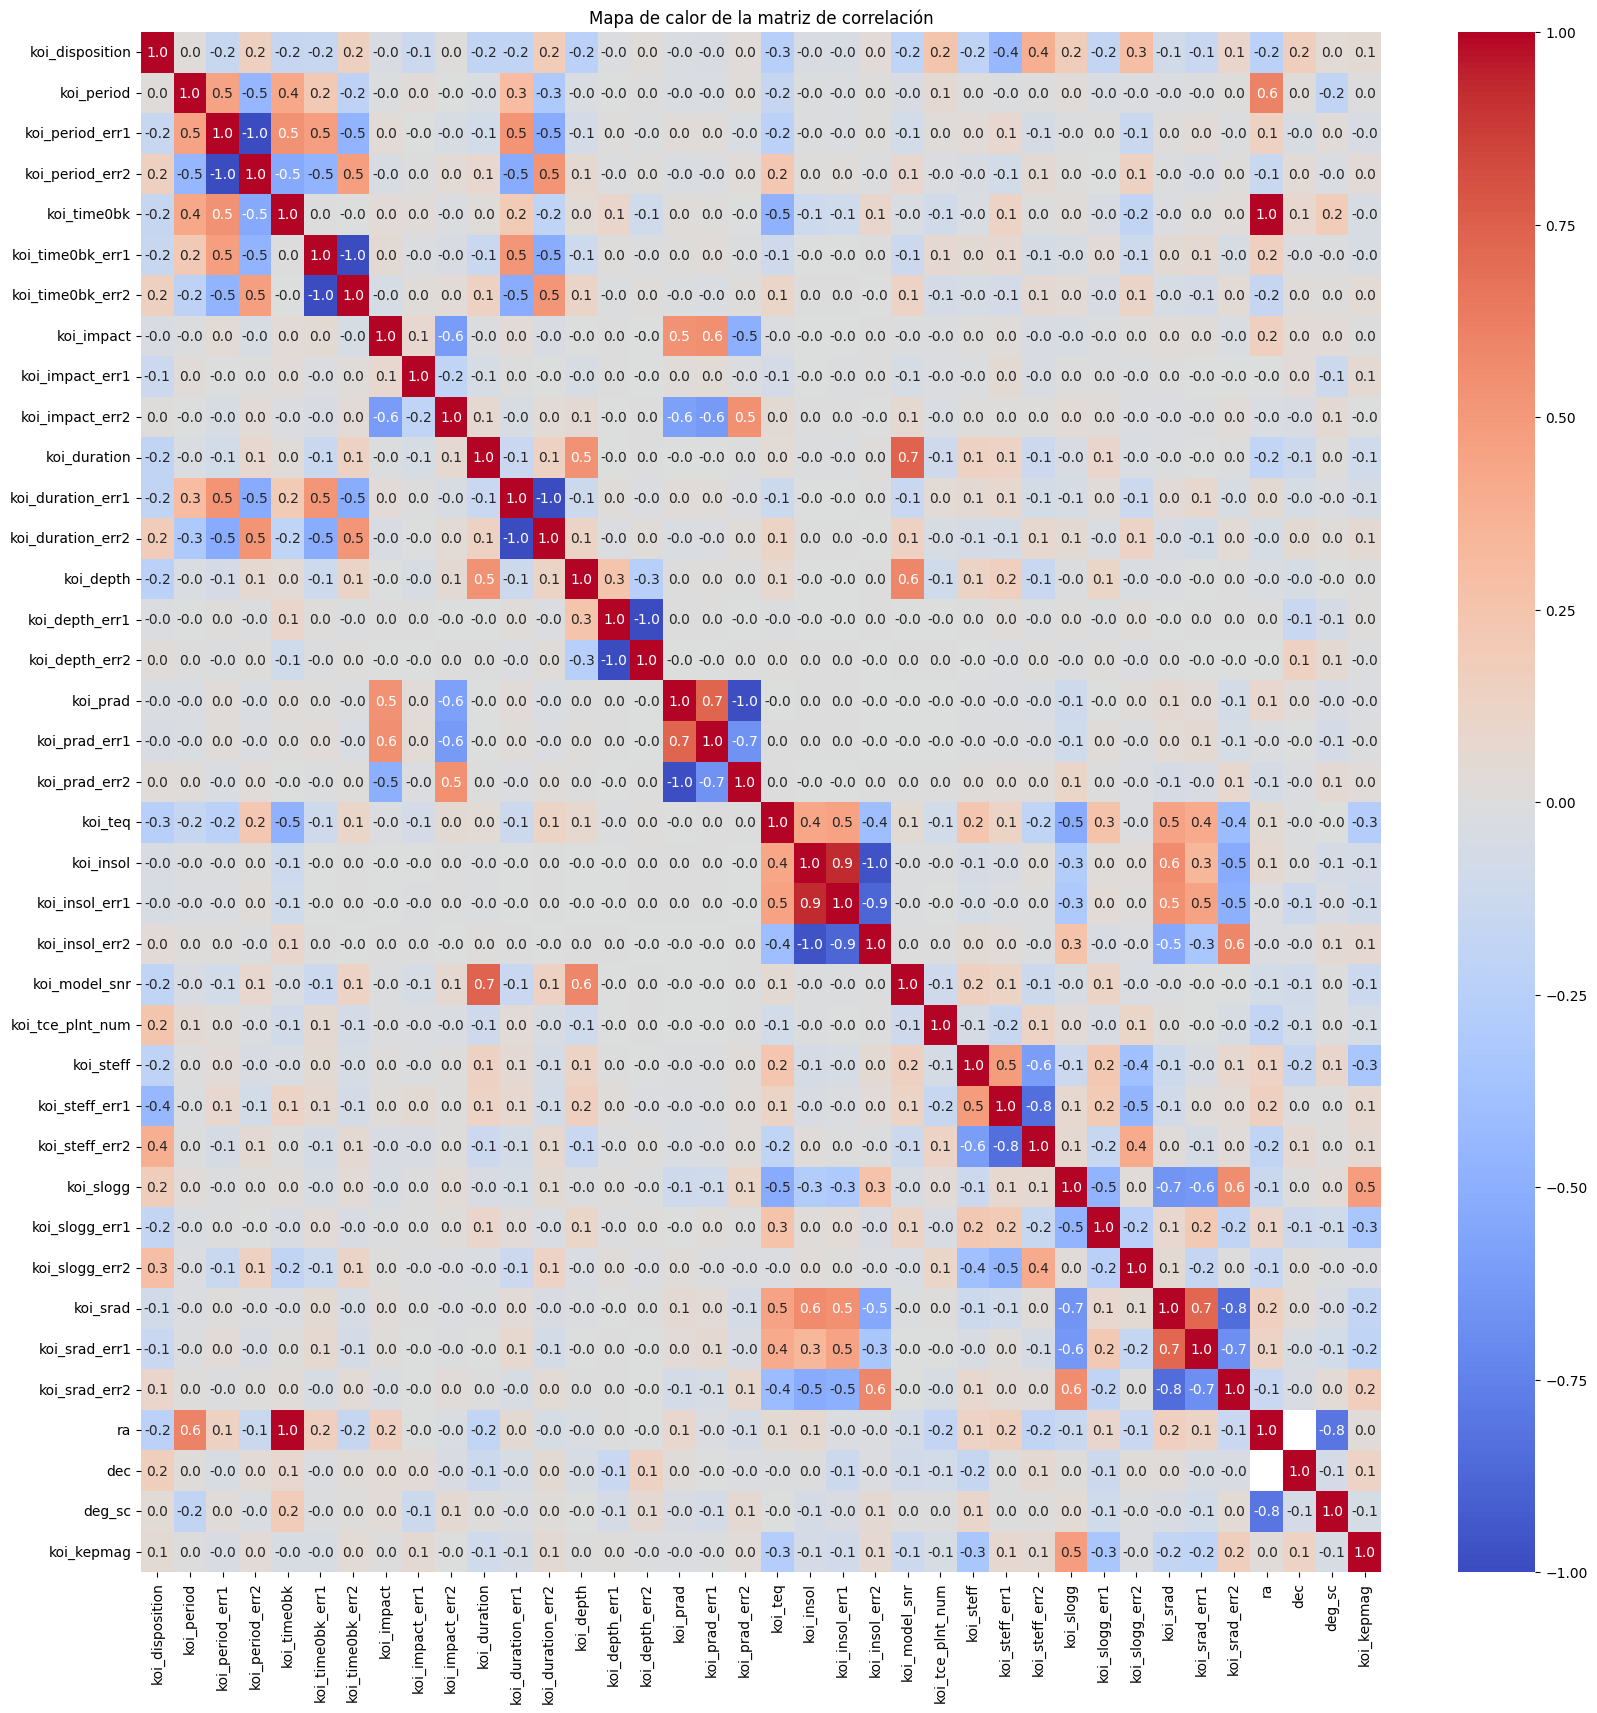

In [180]:

import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

# Identificar variables a eliminar
columns = correlation_matrix.columns
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
upper_tri = correlation_matrix.mask(mask)


Se eliminan las variables con una correlación mayor de 0.7

In [181]:
to_drop = [column for column in upper_tri.columns if any((upper_tri[column] > 0.7) | (upper_tri[column] < -0.7))]
print("Variables candidatas a eliminar debido a alta correlación:")
print(to_drop)

Variables candidatas a eliminar debido a alta correlación:
['koi_period_err1', 'koi_time0bk', 'koi_time0bk_err1', 'koi_duration', 'koi_duration_err1', 'koi_depth_err1', 'koi_prad', 'koi_insol', 'koi_insol_err1', 'koi_steff_err1', 'koi_srad', 'ra']


In [182]:
por_faltantes = (df.isnull().sum() / len(df)) * 100

print(por_faltantes)

koi_disposition      24.131026
koi_period           89.443570
koi_period_err1       0.000000
koi_period_err2       0.000000
koi_time0bk          95.880418
koi_time0bk_err1      0.000000
koi_time0bk_err2      0.000000
koi_impact            0.128737
koi_impact_err1       0.343299
koi_impact_err2       0.371907
koi_duration          0.000000
koi_duration_err1     0.171649
koi_duration_err2     0.171649
koi_depth             0.014304
koi_depth_err1        0.143041
koi_depth_err2        0.143041
koi_prad              0.000000
koi_prad_err1         0.114433
koi_prad_err2         0.114433
koi_teq               0.000000
koi_insol             0.000000
koi_insol_err1        0.128737
koi_insol_err2        0.114433
koi_model_snr         0.000000
koi_tce_plnt_num      0.000000
koi_steff             0.000000
koi_steff_err1        0.128737
koi_steff_err2        0.271778
koi_slogg             0.000000
koi_slogg_err1        0.128737
koi_slogg_err2        0.128737
koi_srad              0.000000
koi_srad

Se eliminan las variables con observaciones nulas de mas de 50%

In [183]:
# Calculate the percentage of missing values in each column
por_faltantes = (df.isnull().sum() / len(df)) * 100

# Filter columns with more than 50% missing values
cols_to_drop = por_faltantes[por_faltantes > 50].index

# Drop the columns if there are any
if len(cols_to_drop) > 0:
    df.drop(cols_to_drop, axis=1, inplace=True)
    print("Columnas eliminadas por tener más del 50% de datos nulos:")
    print(cols_to_drop.tolist())
else:
    print("No hay columnas con más del 50% de datos nulos.")

Columnas eliminadas por tener más del 50% de datos nulos:
['koi_period', 'koi_time0bk', 'ra', 'dec', 'deg_sc']


4.	Identifique los tipos de variables que contiene el set de datos y ejecute–si corresponde–algu´n tipo de codificaci´on o estandarizaci´on en las variables.

In [184]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6991 entries, 0 to 6990
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    5304 non-null   float64
 1   koi_period_err1    6991 non-null   float64
 2   koi_period_err2    6991 non-null   float64
 3   koi_time0bk_err1   6991 non-null   float64
 4   koi_time0bk_err2   6991 non-null   float64
 5   koi_impact         6982 non-null   float64
 6   koi_impact_err1    6967 non-null   float64
 7   koi_impact_err2    6965 non-null   float64
 8   koi_duration       6991 non-null   float64
 9   koi_duration_err1  6979 non-null   float64
 10  koi_duration_err2  6979 non-null   float64
 11  koi_depth          6990 non-null   float64
 12  koi_depth_err1     6981 non-null   float64
 13  koi_depth_err2     6981 non-null   float64
 14  koi_prad           6991 non-null   float64
 15  koi_prad_err1      6983 non-null   float64
 16  koi_prad_err2      6983 

Se cuenta con variables numericas 32 variables numericas con decimales y 1 entera

Entrenamiento y Optimizaci´on del Modelo
Luego de completar la primera parte de inspecci´on y preparaci´on de datos, ahora estamos listos
para empezar con la modelaci´on. En esta parte se espera que realices lo siguiente:
5. Construir set de datos que nos permitan entrenar y testear nuestro modelo
6. Entrene un modelo de Machine Learning a su elecci´on y obtenga m´etricas para medir su
desempe˜no


In [194]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Drop rows where the target variable or any feature has null values
df.dropna(inplace=True)

# Assuming 'koi_disposition' is the target variable
X = df.drop('koi_disposition', axis=1)
y = df['koi_disposition']

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=123)

# Fit the model on the train set
rf_classifier.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Print accuracy, precision, recall, f1 score and roc_auc score on test set
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')


Accuracy: 0.9330357142857143
Precision: 0.9315589353612167
Recall: 0.8765652951699463
F1 Score: 0.903225806451613
ROC AUC Score: 0.9204432025899286


Accuracy tiene un valor de 93.30% de las predicciones del modelo son correctas.

La precisión del modelo es 93.16%, lo que significa que, de todas las veces que el modelo predijo una clase positiva, el 93.16% de esas predicciones fueron correctas.

El recall es 87%, lo que indica que el modelo identificó correctamente el 87% de las instancias positivas reales.

El F1 Score es la media armónica entre precisión y recall, y en este caso es 90%.

El ROC AUC (Área bajo la Curva ROC) de 92.04% indica que el modelo tiene una excelente capacidad para distinguir Cuanto más se acerque
a 1, más discriminativo será, y cuanto más se aproxime a
0,5, menos discriminativo será. Una curva con un valor de
0,75 medio.

7. Utilice una t´ecnica de su preferencia para hacer una optimizaci´on–si corresponde–de los
hiperpar´ametros de su modelo

8. Re-entrene su modelo con la combinaci´on de hiperpar´ametros encontrada y compare bajo
las mismas m´etricas utilizadas antes con el modelo inicial (dado que estamos optimizando el
modelo, se espera que este mejore su desempe˜no)


Se propone implemneter la metodologia RandomizedSearchCV que Define el Espacio de Hiperparámetros: Especificas un rango o conjunto de valores para cada hiperparámetro que deseas ajustar. Estos pueden ser rangos continuos o discretos.

In [195]:
from sklearn.model_selection import RandomizedSearchCV

# Definición de parametros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# modelo a ajustar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='roc_auc',
    random_state=123
)

# ajuste del modelo entrenado con  RandomizedSearchCV
random_search.fit(X_train, y_train)

# mostrar los mejores paramentros
print("Best Parameters: ", random_search.best_params_)

# Se ppropone los mejores parametros
best_rf_classifier = RandomForestClassifier(**random_search.best_params_, random_state=123)

# Ajusta el nuevo modelo con los datos seteados.
best_rf_classifier.fit(X_train, y_train)

# Se genera la predición en el test seteado.
y_pred_best = best_rf_classifier.predict(X_test)

# Print
print(f'Accuracy (optimized): {accuracy_score(y_test, y_pred_best)}')
print(f'Precision (optimized): {precision_score(y_test, y_pred_best)}')
print(f'Recall (optimized): {recall_score(y_test, y_pred_best)}')
print(f'F1 Score (optimized): {f1_score(y_test, y_pred_best)}')
print(f'ROC AUC Score (optimized): {roc_auc_score(y_test, y_pred_best)}')


Best Parameters:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Accuracy (optimized): 0.9343112244897959
Precision (optimized): 0.9334600760456274
Recall (optimized): 0.8783542039355993
F1 Score (optimized): 0.9050691244239631
ROC AUC Score (optimized): 0.9218331971115064


Se cuenta con un mejor ajuste respecto al modelo previo en los parametros de desempeño del modelo.

9. Calcule las m´etricas que son apropiadas para el modelo entrenado

In [199]:
from sklearn.metrics import classification_report

# Imprimir el reporte de clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_best))


Reporte de Clasificación:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1009
         1.0       0.93      0.88      0.91       559

    accuracy                           0.93      1568
   macro avg       0.93      0.92      0.93      1568
weighted avg       0.93      0.93      0.93      1568



10. Si nuestro modelo nos indica que un candidato es confirmado como planeta, ¿Qu´e tan seguros
podemos estar de que ´este sea efectivamente un planeta? Comente

La precisión para la clase planeta cuando sale un resultado de (1.0) es 0.93. Esto significa que cuando el modelo predice que un candidato es un planeta, tenemos un 93% de confianza en que esa predicción sea correcta.

Sin embargo, es importante considerar también la tasa de falsos negativos. En este caso, hay 68 candidatos que eran realmente planetas pero que el modelo clasificó erróneamente como "no planetas". Esto sugiere que, aunque la precisión es alta, aún existe la posibilidad de que algunos planetas reales se pasen por alto.



11. Construya la matriz de confusi´on para visualizar el comportamiento de su modelo.

In [200]:
from sklearn.metrics import confusion_matrix

# Calcular y imprimir la matriz de confusión
cm = confusion_matrix(y_test, y_pred_best)
print("Matriz de Confusión:\n", cm)


Matriz de Confusión:
 [[974  35]
 [ 68 491]]


El modelo predicio 974 observaciones como verdaderos positivos lo que demuestra un buen poder de predición, al igual que se tienen 491 planetas que se selecionaron como no planetas y no lo eran, es decir se cuentan con un verdadero negativo.
La matriz de confusión revela que el modelo tiene un buen rendimiento en general, pero tiende a tener más falsos negativos (68) que falsos positivos (35). Esto significa que es más probable que el modelo clasifique erróneamente un candidato a planeta real como "no planeta" en lugar de clasificar erróneamente un "no planeta" como planeta.